Nombre: Pablo César Méndez Rodas                               
Carnet: 22006487            
Text Mining & Image Recognition, sección L                  
PAPD - Tercer trimestre 2023

# LABORATORIO #1

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Problema 1

In [16]:
def imagen_canal(imagen, color):
    if color not in [1,2,3,10,20,30]:
        raise ValueError("El código de color debe ser 1,2,3,10,20,30")
 
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    alto = imagen.shape[0]
    ancho = imagen.shape[1]

    monocromo = np.zeros((alto,ancho,3))

    for i in range (0,alto):
        for j in range(0,ancho):
            pixel = imagen[i,j]

            #Extraemos canales
            red = pixel[0]
            green = pixel [1]
            blue = pixel [2]

            if color == 1:
                monocromo[i,j] = [blue,0,0]
            elif color == 2:
                monocromo[i,j] = [0,green,0]
            elif color == 3:
                monocromo[i,j] = [0,0,red]
            elif color == 10:
                monocromo[i,j] = [0,green,red]
            elif color == 20:
                monocromo[i,j] = [blue,green,0]
            elif color == 30:
                monocromo[i,j] = [blue,0,red]
    return monocromo


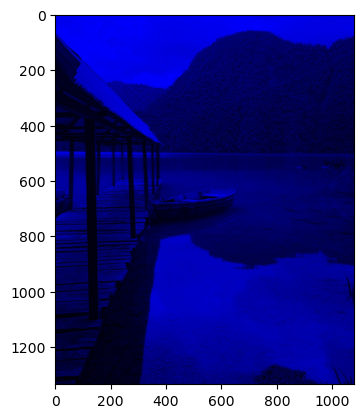

In [21]:
img = cv2.imread("laguna.jpeg")
cod = int(input('Ingrese el código del color: '))

img_canal = imagen_canal(img,cod)

nombre_img= f"laguna_cod{cod}.jpg"
cv2.imwrite(nombre_img,img_canal)
img_canal = cv2.imread(nombre_img)
img_canal = cv2.cvtColor(img_canal, cv2.COLOR_BGR2RGB)
plt.imshow(img_canal)
plt.show()

## Problema 2

In [44]:
def construir_color(imagen_r, imagen_g, imagen_b):

    alto = imagen_r.shape[0]
    ancho = imagen_r.shape[1]

    monocromo = np.zeros((alto,ancho,3))

    for i in range (0,alto):
        for j in range(0,ancho):
            pixel_r = imagen_r[i,j]
            pixel_g = imagen_g[i,j]
            pixel_b = imagen_b[i,j]

            #Extraemos canales
            red = pixel_r[0]
            green = pixel_g [0]
            blue = pixel_b [0]

            monocromo[i,j] = [blue,green,red]

    return monocromo


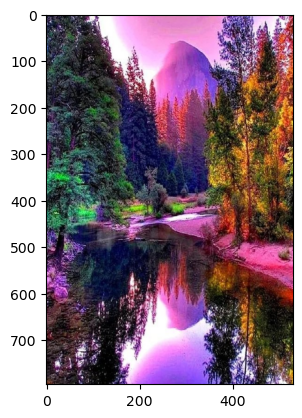

In [46]:
img_r = cv2.imread("imagen2/imagen2_salida_gray_rojo.jpg")
img_g = cv2.imread("imagen2/imagen2_salida_gray_verde.jpg")
img_b = cv2.imread("imagen2/imagen2_salida_gray_azul.jpg")

imagen_color = construir_color(img_r, img_g, img_b)

cv2.imwrite("imagen2/imagen 2 a color.jpg",imagen_color)
imagen_color = cv2.imread("imagen2/imagen 2 a color.jpg")
imagen_color = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_color)
plt.show()


## Problema 3

In [48]:
def construir_gris(imagen):
 
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    alto = imagen.shape[0]
    ancho = imagen.shape[1]

    gris_r = np.zeros((alto,ancho,1))
    gris_g = np.zeros((alto,ancho,1))
    gris_b = np.zeros((alto,ancho,1))

    for i in range (0,alto):
        for j in range(0,ancho):
            pixel = imagen[i,j]

            #Extraemos canales
            red = pixel[0]
            green = pixel [1]
            blue = pixel [2]

            gris_r[i,j] = red
            gris_g[i,j] = green
            gris_b[i,j] = blue


    return gris_r,gris_g,gris_b

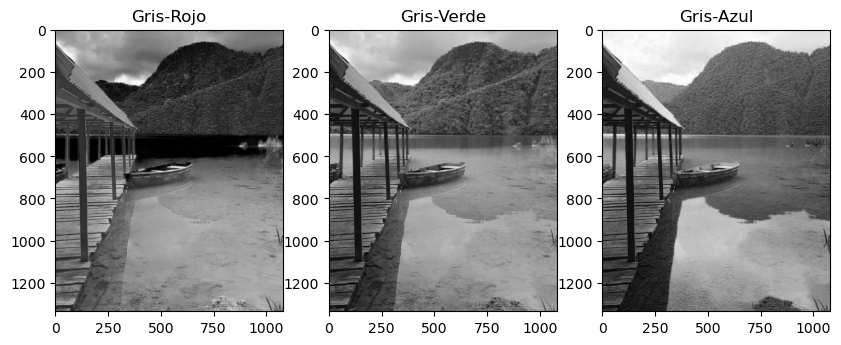

In [51]:
img = cv2.imread("laguna.jpeg")

img_gris_r,img_gris_g,img_gris_b = construir_gris(img)

cv2.imwrite("laguna gris_r.jpg",img_gris_r)
cv2.imwrite("laguna gris_g.jpg",img_gris_g)
cv2.imwrite("laguna gris_b.jpg",img_gris_b)
img_gris_r = cv2.imread("laguna gris_r.jpg")
img_gris_g = cv2.imread("laguna gris_g.jpg")
img_gris_b = cv2.imread("laguna gris_b.jpg")

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gris_r)
plt.title("Gris-Rojo")

plt.subplot(1, 3, 2)
plt.imshow(img_gris_g)
plt.title("Gris-Verde")

plt.subplot(1, 3, 3)
plt.imshow(img_gris_b)
plt.title("Gris-Azul")

plt.show()

## Problema 4

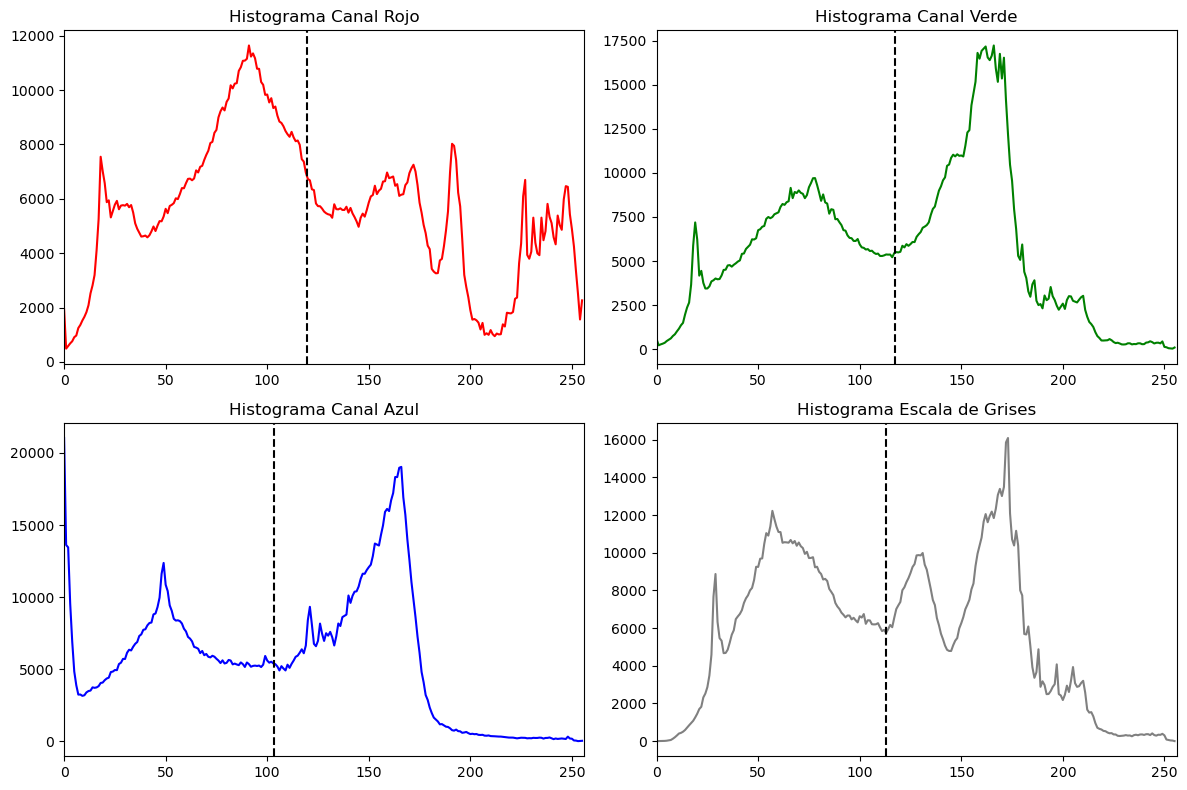

In [65]:
def mostrar_histogramas(imagen):
    # Calculamos el histograma para cada canal de color
    histograma_r = np.histogram(imagen[:, :, 0], bins=256, range=(0, 256))[0]
    histograma_g = np.histogram(imagen[:, :, 1], bins=256, range=(0, 256))[0]
    histograma_b = np.histogram(imagen[:, :, 2], bins=256, range=(0, 256))[0]

    # Calculamos el histograma de escala de grises con promedio aritmético
    promedio = np.mean(imagen, axis=2).astype(np.uint8)
    histograma_gris = np.histogram(promedio, bins=256, range=(0, 256))[0]

    # Calculamos la media de la distribución de cada canal de color
    media_r = np.average(np.arange(256), weights=histograma_r)
    media_g = np.average(np.arange(256), weights=histograma_g)
    media_b = np.average(np.arange(256), weights=histograma_b)
    media_gris = np.average(np.arange(256), weights=histograma_gris)

    # Mostramos histogramas
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(histograma_r, color='red')
    plt.axvline(x=media_r, color='black', linestyle='dashed')
    plt.title("Histograma Canal Rojo")
    plt.xlim(0, 256)

    plt.subplot(2, 2, 2)
    plt.plot(histograma_g, color='green')
    plt.axvline(x=media_g, color='black', linestyle='dashed')
    plt.title("Histograma Canal Verde")
    plt.xlim(0, 256)

    plt.subplot(2, 2, 3)
    plt.plot(histograma_b, color='blue')
    plt.axvline(x=media_b, color='black', linestyle='dashed')
    plt.title("Histograma Canal Azul")
    plt.xlim(0, 256)

    plt.subplot(2, 2, 4)
    plt.plot(histograma_gris, color='gray')
    plt.axvline(x=media_gris, color='black', linestyle='dashed')
    plt.title("Histograma Escala de Grises")
    plt.xlim(0, 256)

    plt.tight_layout()
    plt.show()


imagen = cv2.imread("laguna.jpeg")

mostrar_histogramas(imagen)

## Problema 5

In [69]:
# Se subió un archivo PDF con la respuesta

from PyPDF2 import PdfReader

def extraer_texto_pdf(nombre_archivo):
    texto = ""
    with open(nombre_archivo, "rb") as archivo_pdf:
        lector = PdfReader(archivo_pdf)
        num_paginas = len(lector.pages)
        for pagina in range(num_paginas):
            texto += lector.pages[pagina].extract_text()
    return texto

nombre_archivo = "Problema 5.pdf"
texto_pdf = extraer_texto_pdf(nombre_archivo)
print(texto_pdf)

Problema 5  
Espacio de color HSV  
El espacio de color HSV (Hue, Saturation, Value) es un modelo de color que se utiliza para representar 
colores de manera más intuitiva que el tradicional modelo RGB (Red, Green, Blue). En el espacio de color 
HSV, los colores se describen mediante tres componentes:  
1. Matiz (Hue): Representa el tipo de color, como rojo, verde, azul, etc. Se representa como un ángulo en 
un círculo de colores, donde 0° y 360° corresponden a rojo puro, 120° a ver de puro y 240° a azul puro.  
2. Saturación (Saturation): Indica la pureza o intensidad del color. Una saturación alta significa colores 
más vivos y puros, mientras que una saturación baja se acerca a tonos de gris.  
3. Valor (Value): Representa la intensidad o brillo del color. Un valor alt o indica colores más brillantes, 
mientras que un valor bajo representa colores más oscuros.  
El espacio de color HSV es útil en aplicaciones de procesamiento de imágenes y visión por computadora, 
ya que permite sep

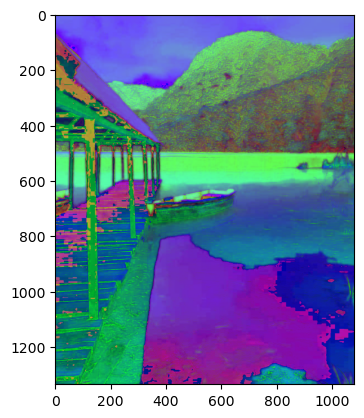

In [67]:
#Pequeña demostración de un formato HSV

# Cargamos imagen en formato RGB
imagen_rgb = cv2.imread("laguna.jpeg", cv2.IMREAD_COLOR)
# Convertimos imagen a formato HSV
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2HSV)
plt.imshow(imagen_hsv)
plt.show()
